In [1]:
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/p9/gsg6n22x4bn6jplw95gz1fmh0000gn/T/pip-req-build-ndw8hz4d
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/p9/gsg6n22x4bn6jplw95gz1fmh0000gn/T/pip-req-build-ndw8hz4d
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0f06c3f4c86d79e0fe1391e3f0aa81779bbd509f
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit
from qiskit.providers.fake_provider import FakeMontreal
from qiskit.providers.fake_provider import FakeMumbai
from qiskit.providers.fake_provider import FakeSydney

In [3]:
from qiskit_textbook.widgets import scalable_circuit

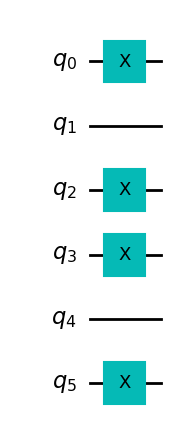

In [4]:
nqubits = 6
qc = QuantumCircuit(nqubits)
qc.x(0)
qc.x(2)
qc.x(3)
qc.x(5)
qc.draw("mpl")

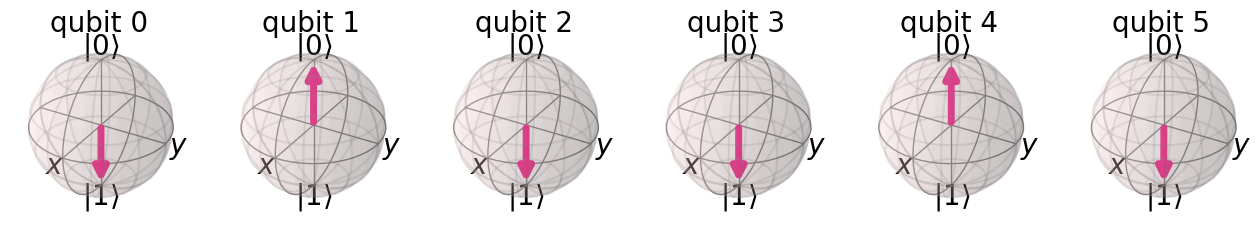

In [5]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [6]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

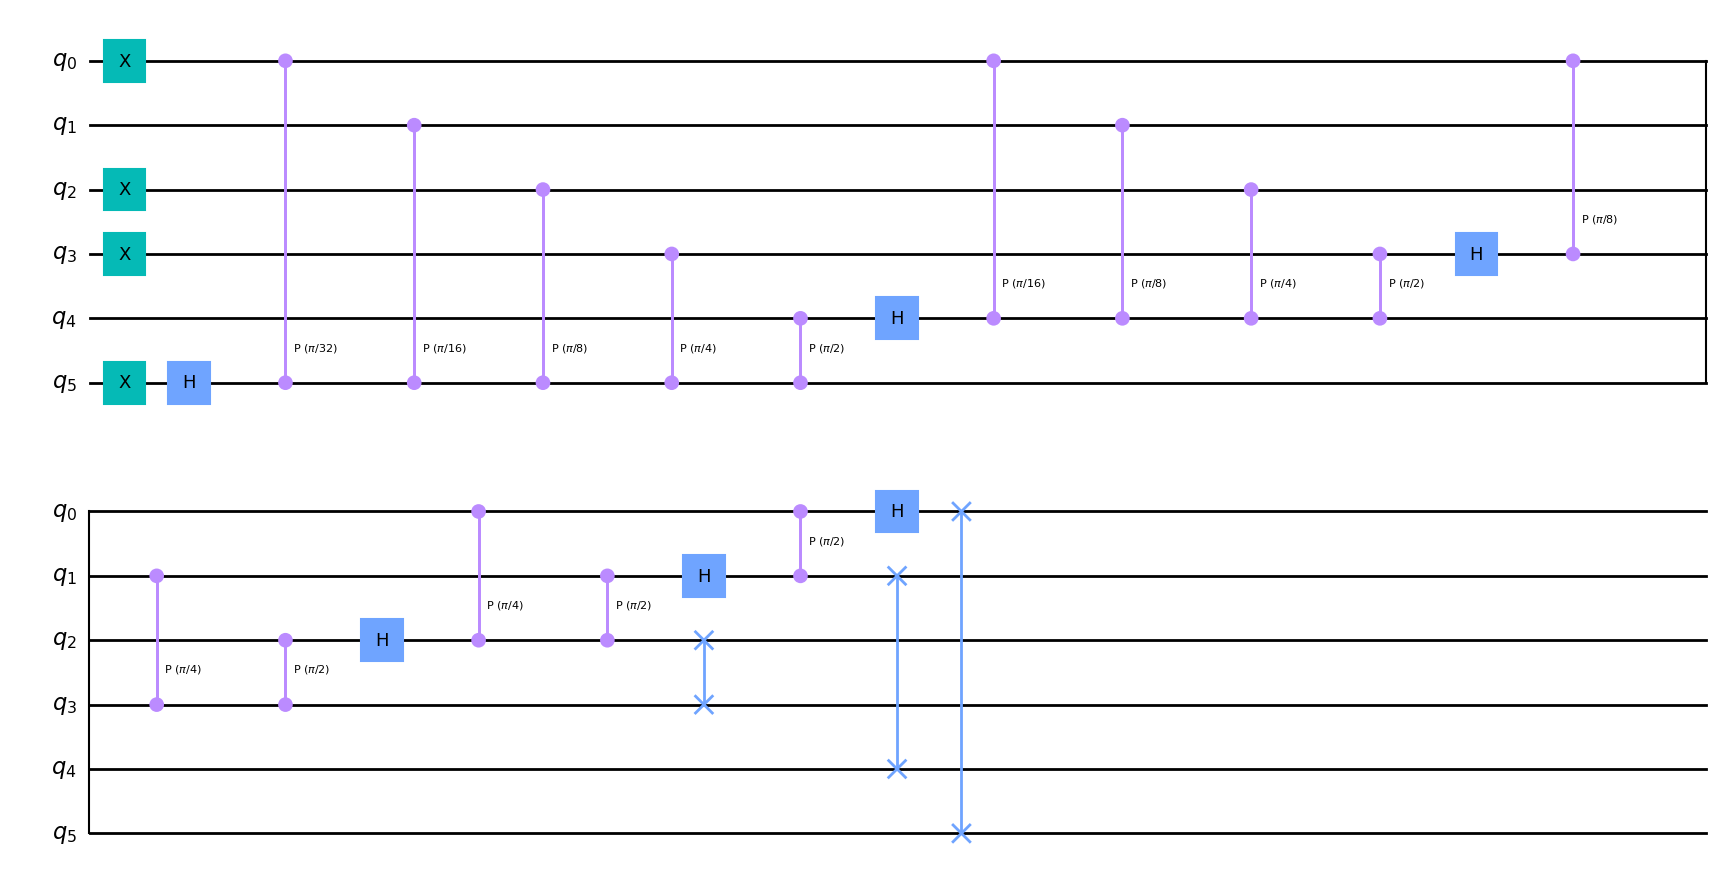

In [7]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qft(qc,nqubits)
qc.draw("mpl")

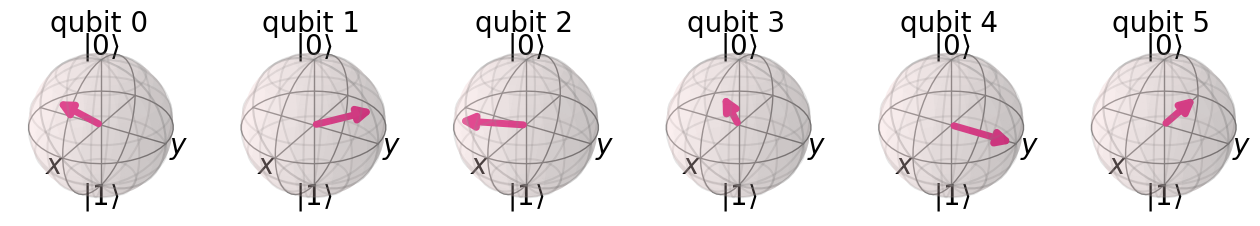

In [8]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [9]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

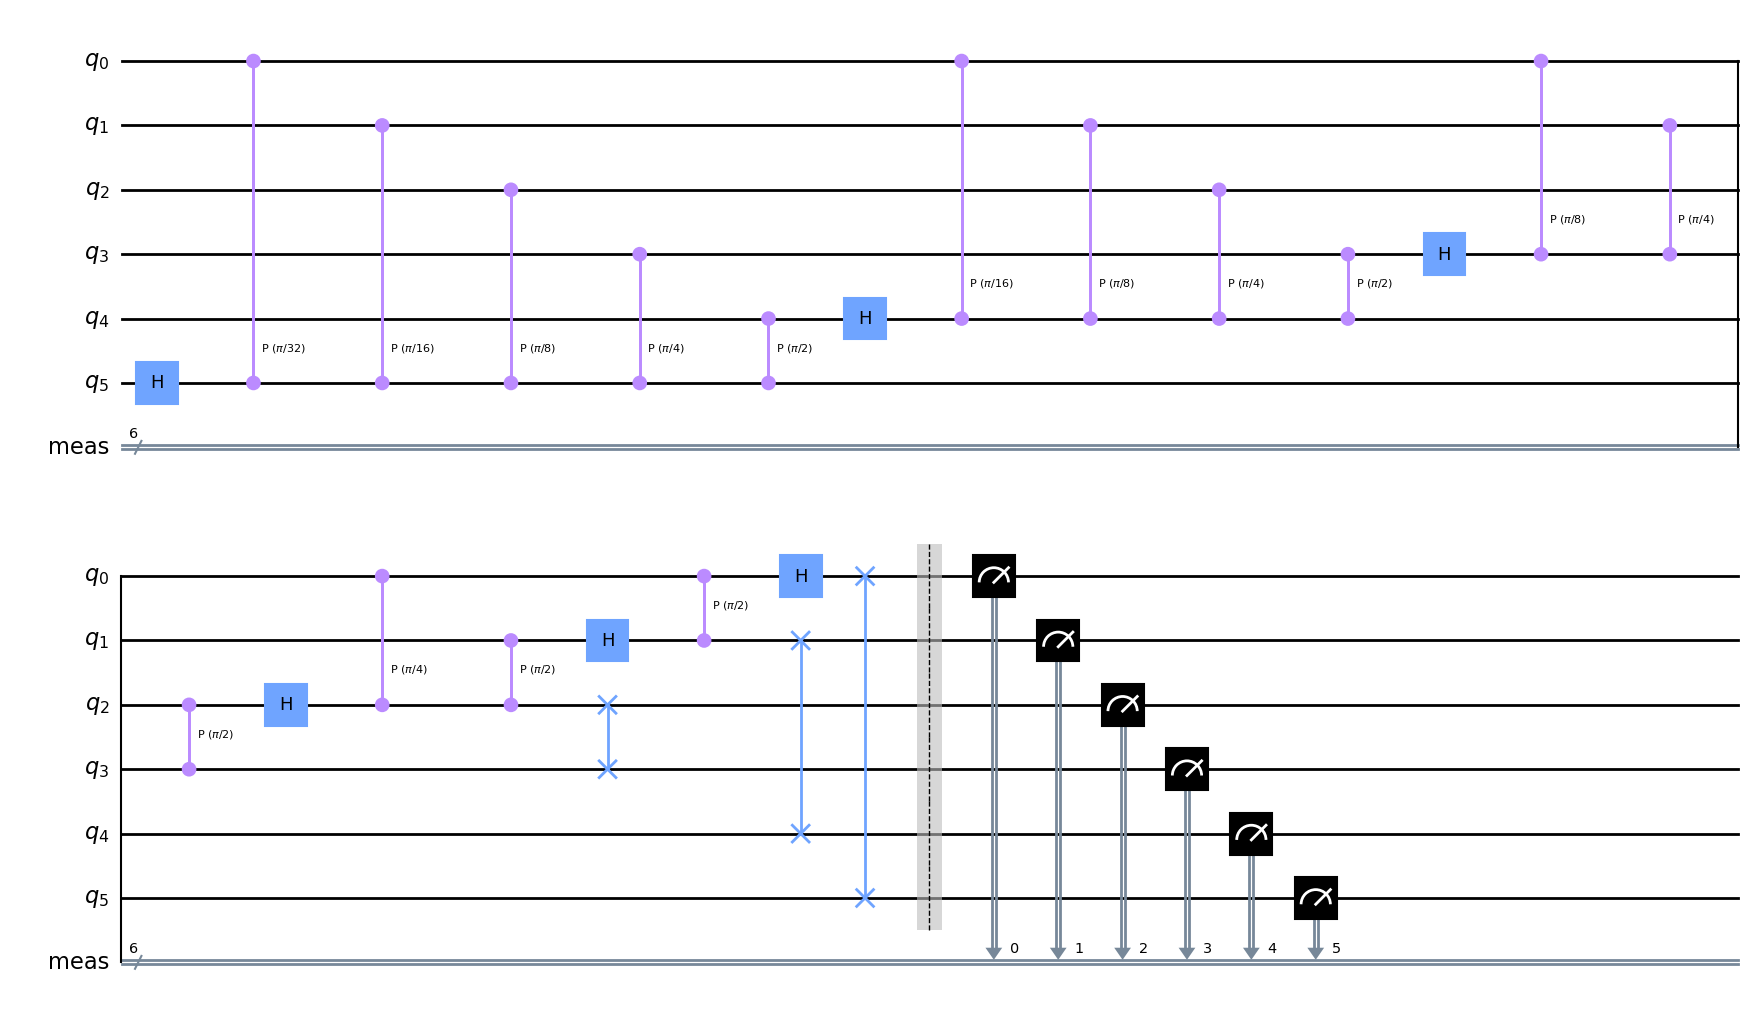

In [10]:
qc = QuantumCircuit(nqubits)
qft(qc,nqubits)
qc.measure_all()
qc.draw("mpl")

In [11]:
backend = FakeMontreal()

In [12]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


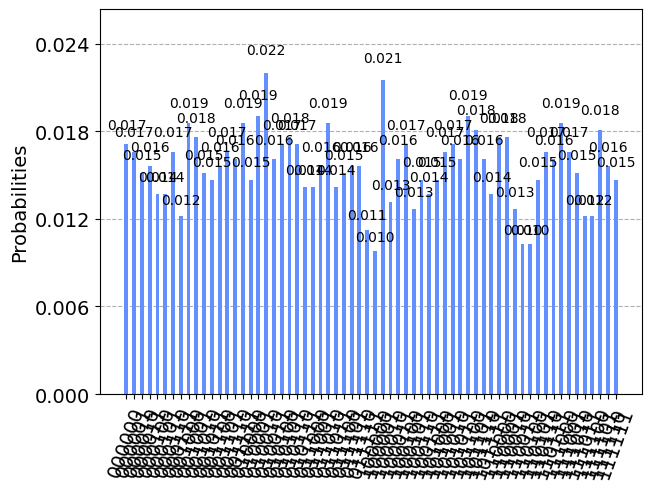

In [13]:
counts = job.result().get_counts()
plot_histogram(counts)

In [14]:
counts

{'011111': 23,
 '100100': 35,
 '111011': 25,
 '000110': 34,
 '101110': 33,
 '111000': 38,
 '001110': 33,
 '000010': 31,
 '000001': 34,
 '100101': 26,
 '001101': 34,
 '010001': 39,
 '010110': 35,
 '010111': 29,
 '110110': 34,
 '110101': 30,
 '001111': 38,
 '101100': 39,
 '100111': 28,
 '010010': 45,
 '000101': 28,
 '110001': 36,
 '000000': 35,
 '011101': 32,
 '000100': 28,
 '111111': 30,
 '101101': 37,
 '110011': 21,
 '100110': 30,
 '010000': 30,
 '001011': 30,
 '011011': 29,
 '001001': 36,
 '110000': 36,
 '010011': 33,
 '011001': 32,
 '110111': 33,
 '101010': 35,
 '010101': 36,
 '010100': 35,
 '000111': 25,
 '011110': 32,
 '111100': 25,
 '001000': 38,
 '111010': 31,
 '100011': 33,
 '001100': 32,
 '101000': 30,
 '001010': 31,
 '011000': 29,
 '100000': 20,
 '111110': 32,
 '011100': 31,
 '101111': 28,
 '101001': 34,
 '000011': 32,
 '011010': 38,
 '101011': 33,
 '110010': 26,
 '111101': 37,
 '110100': 21,
 '100001': 44,
 '111001': 34,
 '100010': 27}

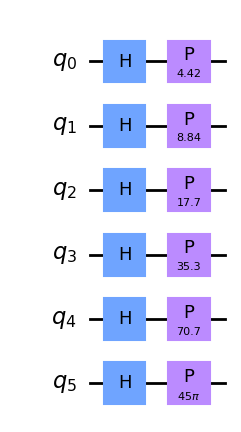

In [15]:
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(45*pi/32,0)
qc.p(45*pi/16,1)
qc.p(45*pi/8,2)
qc.p(45*pi/4,3)
qc.p(45*pi/2,4)
qc.p(45*pi,5)
qc.draw("mpl")

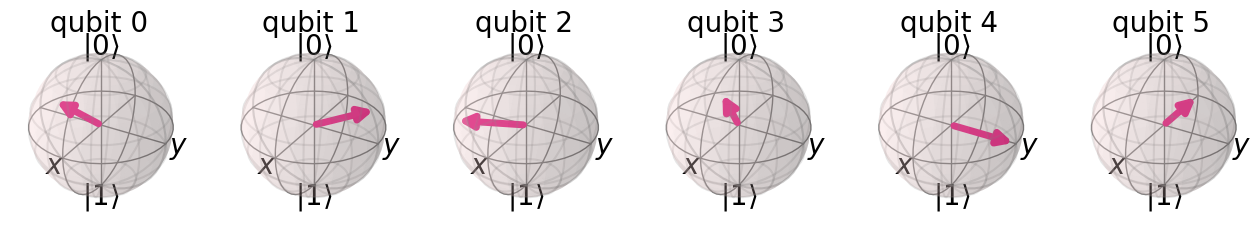

In [16]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

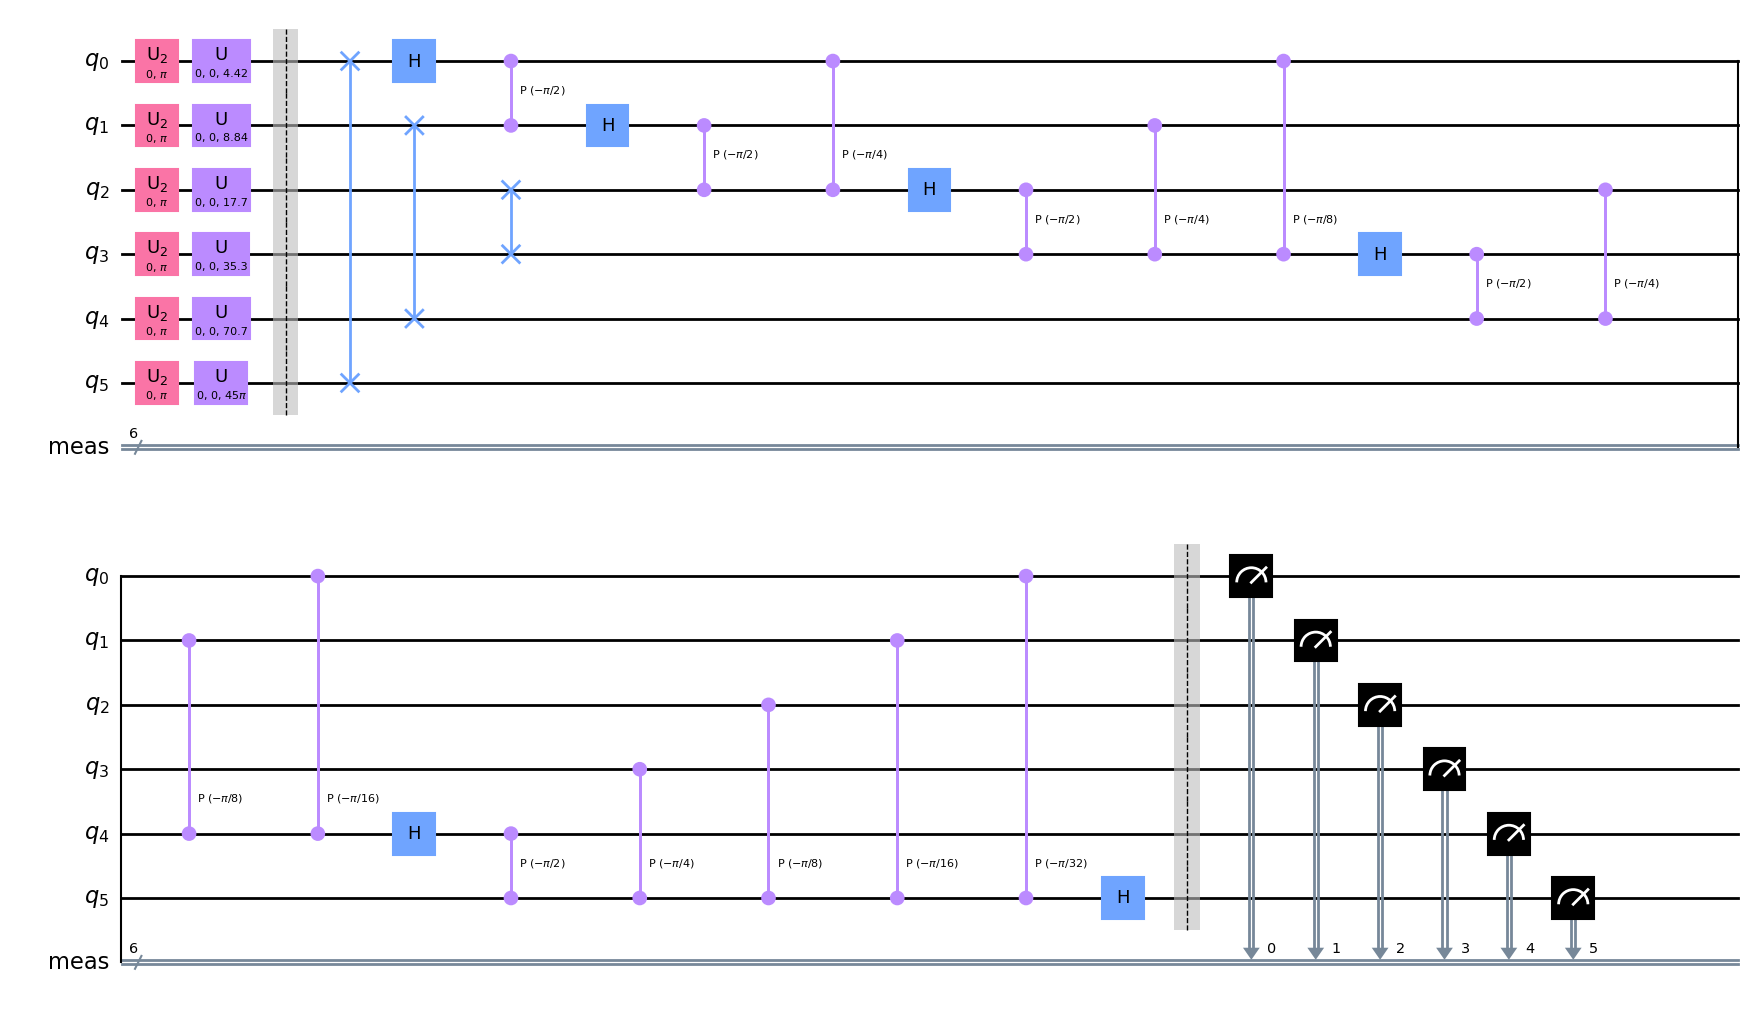

In [17]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw("mpl")

In [18]:
backend = FakeMontreal()

In [19]:
shots = 2048
#transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


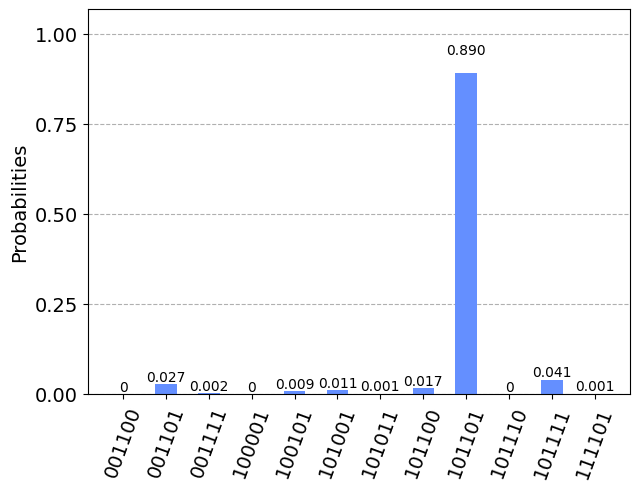

In [20]:
counts = job.result().get_counts()
plot_histogram(counts)

In [23]:
counts

{'100001': 1,
 '101110': 1,
 '001100': 1,
 '101100': 34,
 '101011': 3,
 '101111': 83,
 '111101': 3,
 '100101': 18,
 '101101': 1823,
 '001111': 4,
 '001101': 55,
 '101001': 22}